In [ ]:
import numpy as np
import numpy.random as npr
import scipy.stats as stats
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

# Chapter

In [ ]:
likelyhood_positive = np.array([0.95, 0.01])
p_vampire = 0.001
prior = np.array([p_vampire, 1-p_vampire])

pr_positive = (prior*likelyhood_positive).sum()
pr_x_given_positive = likelyhood_positive*prior /(prior*likelyhood_positive).sum()
pr_x_given_positive[0]

0.08683729433272395

In [ ]:
n_grid = 1000
p_grid = np.linspace(0, 1, n_grid)
prob_p = np.ones(n_grid)
prob_data = stats.binom.pmf(6, n=9, p=p_grid)
posterior = prob_data*prob_p
posterior = posterior/posterior.sum()

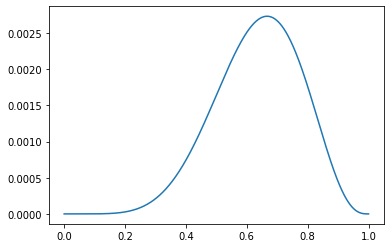

In [ ]:
plt.plot(p_grid, posterior)

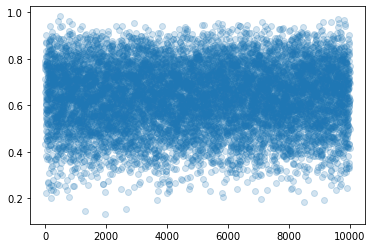

In [ ]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
plt.plot(samples, "o", alpha=0.2)
plt.show()

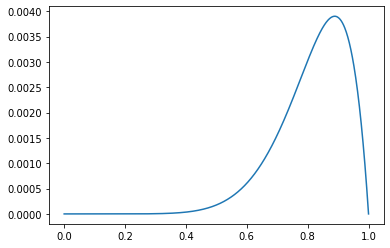

In [ ]:
n_grid = 1000
p_grid = np.linspace(0, 1, n_grid)
prob_p = np.ones(n_grid)
prob_data = stats.binom.pmf(8, n=9, p=p_grid)
posterior = prob_data*prob_p
posterior = posterior/posterior.sum()
plt.plot(p_grid, posterior)

In [ ]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
az.hdi(samples, hdi_prob=0.9)

array([0.65865866, 0.98698699])

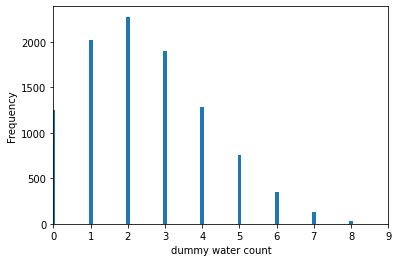

In [ ]:
n_grid = 1000
p_grid = np.linspace(0, 1, n_grid)
prob_p = np.ones(n_grid)
prob_data = stats.binom.pmf(2, n=9, p=p_grid)
posterior = prob_data*prob_p
posterior = posterior/posterior.sum()

samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

dummy_w = stats.binom.rvs(n=9, p=samples)
bar_width = 0.1
plt.hist(dummy_w, bins=np.arange(0, 10) - bar_width / 2, width=bar_width)
plt.xlim(0, 9)
plt.xlabel("dummy water count")
plt.ylabel("Frequency");

# Questions

In [ ]:
n_grid = 1000
p_grid = np.linspace(0, 1, n_grid)
prob_p = np.ones(n_grid)
prob_data = stats.binom.pmf(6, n=9, p=p_grid)
posterior = prob_data*prob_p
posterior = posterior/posterior.sum()

np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

## 3E1. 
How much posterior probability lies below p = 0.2?

In [ ]:
posterior[p_grid<0.2].sum()

0.0008560951294218481

## 3E2. 
How much posterior probability lies above p = 0.8

In [ ]:
posterior[p_grid>0.8].sum()

0.12034491402214356

## 3E3. 
How much posterior probability lies between p = 0.2 and p = 0.8?

In [ ]:
posterior[np.bitwise_and(p_grid<0.8, p_grid>0.2)].sum()

0.8787989908484346

## 3E4. 
20% of the posterior probability lies below which value of p?

In [ ]:
np.quantile(samples, 0.2)

0.5155155155155156

In [ ]:
p_grid[np.where(np.cumsum(posterior)>0.2)[0][0]]

0.5165165165165165

## 3E5.
20% of the posterior probability lies above which value of p?

In [ ]:
np.quantile(samples, 0.8)

0.7597597597597597

## 3E6. 
Which values of p contain the narrowest interval equal to 66% of the posterior probability?

In [ ]:
az.hdi(samples, 0.66)

array([0.51651652, 0.78878879])

## 3E7. 
Which values of p contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

## 3M1. 
Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

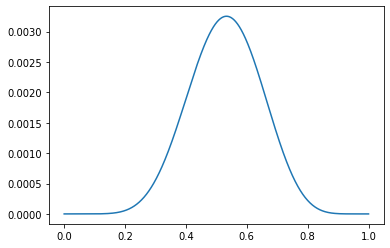

In [ ]:
n_grid = 1000
p_grid = np.linspace(0,1, n_grid)
prior = np.ones(n_grid)
likelyhood = stats.binom.pmf(8, n=15, p=p_grid)

posterior = likelyhood*prior
posterior = posterior/posterior.sum()

plt.plot(p_grid, posterior)

## 3M2. 
Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for p.

In [ ]:
samples = np.random.choice(p_grid, size=10000, p=posterior, replace=True)
az.hdi(samples, 0.9)

array([0.34034034, 0.72672673])

## 3M3. 
Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in p. What is the probability of observing
8 water in 15 tosses?

0.1468


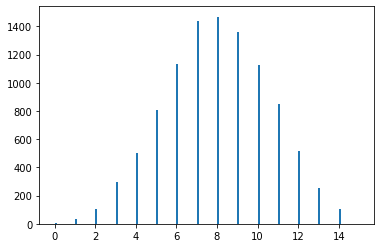

In [ ]:
w = stats.binom.rvs(n=15, p=samples)
p_8 = (w==8).mean()
print(p_8)
plt.hist(w, bins=np.arange(0, 16), width=0.1 )

plt.show()


## 3M4. 
Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

0.1801


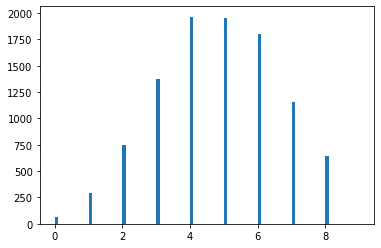

In [ ]:
w = stats.binom.rvs(n=9, p=samples)
p_6 = (w==6).mean()
print(p_6)
plt.hist(w, bins=np.arange(0, 10), width=0.1 )
plt.show()

## 3M5. 
Start over at 3M1, but now use a prior that is zero below p = 0.5 and a constant above p = 0.5.
This corresponds to prior information that a majority of the Earth’s surface is water. Repeat each
problem above and compare the inferences. What difference does the better prior make? If it helps,
compare inferences (using both priors) to the true value p = 0.7.

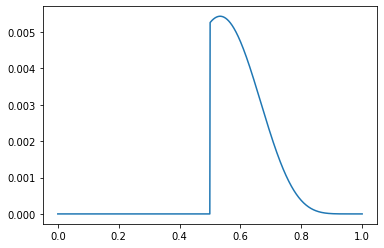

In [ ]:
prior = np.zeros(n_grid)
prior[p_grid>0.5] = 1


likelyhood = stats.binom.pmf(8, n=15, p=p_grid)

posterior = likelyhood*prior
posterior = posterior/posterior.sum()

plt.plot(p_grid, posterior)
plt.show()

In [ ]:
samples = np.random.choice(p_grid, size=10000, p=posterior, replace=True)
az.hdi(samples, 0.9)

array([0.5005005 , 0.71371371])

0.1633


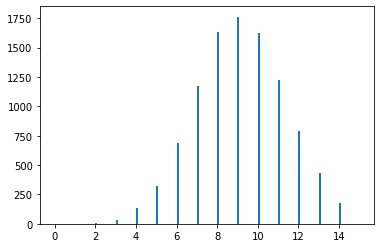

In [ ]:
w = stats.binom.rvs(n=15, p=samples)
p_8 = (w==8).mean()
print(p_8)
plt.hist(w, bins=np.arange(0, 16), width=0.1 )
plt.show()


0.2383


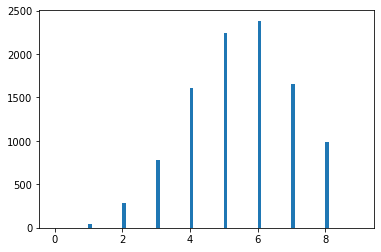

In [ ]:
w = stats.binom.rvs(n=9, p=samples, size=10000)
p_6 = (w==6).mean()
print(p_6)
plt.hist(w, bins=np.arange(0, 10), width=0.1 )
plt.show()

## 3M6. 
Suppose you want to estimate the Earth’s proportion of water very precisely. Specifically, you
want the 99% percentile interval of the posterior distribution of p to be only 0.05 wide. This means
the distance between the upper and lower bound of the interval should be 0.05. How many times will
you have to toss the globe to do this?

In [ ]:
percentile = 0.99
width = 0.05

n_grid = 100
p_grid = np.linspace(0,1,n_grid)
prior = np.ones(n_grid)

i = 1
def exp(n_success, n_throws, prior, p_grid):
  likelyhood = stats.binom.pmf(n_success, n=n_throws, p=p_grid)
  posterior = prior*likelyhood
  posterior = posterior/posterior.sum()

  samples = np.random.choice(p_grid, size=100, p=posterior, replace=True)
  hdi = az.hdi(samples, percentile)
  width_data = hdi[1] - hdi[0]
  return width_data

while True:
  for j in range(i):
    widths = np.zeros(10)
    for k in range(10):
      widths[k] = exp(j, i, prior, p_grid)
      width_data = widths.mean()
    if width_data>width:
      break
  else:
    print(f"On average, it would take {i} throws")
    break
  i+=100

On average, it would take 3101 throws


## H1. 
Using grid approximation, compute the posterior distribution for the probability of a birth being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior
probability?

In [ ]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

In [ ]:
births = np.concatenate([np.expand_dims(birth1, axis=1), np.expand_dims(birth2, axis=1)], axis=1)
births.T

array([[1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]])

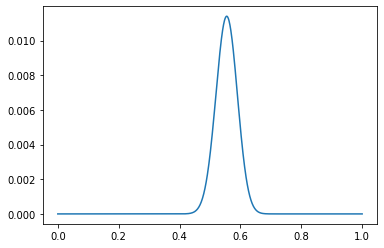

In [ ]:
n_grid = 1000
p_grid = np.linspace(0, 1, n_grid)
prior = np.ones(n_grid)
likelyhood = stats.binom.pmf(births.sum(), n=births.size, p=p_grid)
posterior = likelyhood*prior
posterior = posterior/posterior.sum()

plt.plot(p_grid, posterior)
plt.show()

## 3H2. 
Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89%, and 97% highest posterior
density intervals.

In [ ]:
sample = np.random.choice(p_grid, size=10_000, p=posterior, replace=True)

hdis = [0.5, 0.89, 0.97]
for hdi in hdis:
  print(f"For HDI {hdi}: {az.hdi(sample, hdi)!r}")

For HDI 0.5: array([0.52552553, 0.57357357])
For HDI 0.89: array([0.5005005 , 0.61261261])
For HDI 0.97: array([0.48048048, 0.63063063])


## 3H3. 
Use rbinom to simulate 10,000 replicates of 200 births. You should end up with 10,000 numbers, each one a count of boys out of 200 births. Compare the distribution of predicted numbers
of boys to the actual count in the data (111 boys out of 200 births). There are many good ways to
visualize the simulations, but the dens command (part of the rethinking package) is probably the
easiest way in this case. Does it look like the model fits the data well? That is, does the distribution
of predictions include the actual observation as a central, likely outcome?

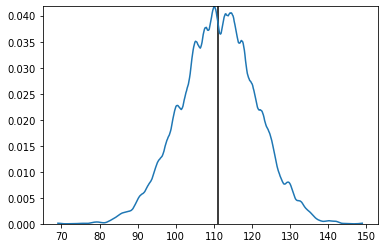

In [ ]:
birthn = stats.binom.rvs(n=200, p=sample, size=10000)
kde = az.kde(birthn)
plt.plot(*kde)
plt.vlines(births.sum(), 0, 0.1)
plt.ylim(0, kde[1].max())
plt.show()

## 3H4. 
Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys
in the first births, birth1. How does the model look in this light?

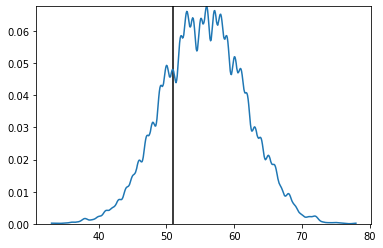

In [ ]:
likelyhood = stats.binom.pmf(birth1.sum(), len(birth1), p=p_grid)
posterior = likelyhood*prior
posterior = posterior/posterior.sum()

samples = np.random.choice(p_grid, size=10_000, p=posterior, replace=True)
counts = stats.binom.rvs(n=100, p=sample, size=10_000)
kde = az.kde(counts)
plt.plot(*kde)
plt.vlines(birth1.sum(), 0, 0.1)
plt.ylim(0, kde[1].max())
plt.show()


## 3H5. 
The model assumes that sex of first and second births are independent. To check this assumption, focus now on second births that followed female first borns. Compare 10,000 simulated counts
of boys to only those second births that followed girls. To do this correctly, you need to count the
number of first borns who were girls and simulate that many births, 10,000 times. Compare the
counts of boys in your simulations to the actual observed count of boys following girls. How does the
model look in this light? Any guesses what is going on in these data?

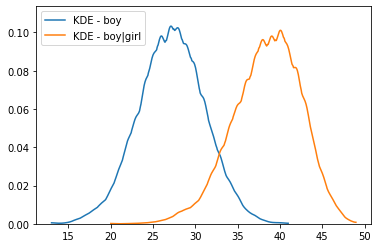

In [ ]:
# Thinking differently:
first_girl = births.T[:, births.T[0]==0]
likelyhood_second_boy_given_girl = stats.binom.pmf(first_girl[1].sum(), first_girl[1].size, p=p_grid)
posterior_2boy = likelyhood_second_boy_given_girl*prior
posterior_2boy = posterior_2boy/posterior_2boy.sum()

samples = np.random.choice(p_grid, size=10_000, p=posterior_2boy, replace=True)

counts = stats.binom.rvs(n=first_girl[1].size, p=samples, size=10_000)


likelyhood = stats.binom.pmf(births.sum(), n=births.size, p=p_grid)
posterior_boys = likelyhood*prior
posterior_boys = posterior_boys/posterior_boys.sum()

sample_boys = np.random.choice(p_grid, size=10_000, p=posterior_boys, replace=True)
count_boys = stats.binom.rvs(n=first_girl[1].size, p=sample_boys, size=10_000)


kde = az.kde(counts, bw=0.5)
kdeb = az.kde(count_boys, bw=0.5)
plt.plot(*kdeb, label="KDE - boy")
plt.plot(*kde, label="KDE - boy|girl")
# plt.vlines(boygivengirl, 0, 1, label="Boys given first birth was a girl")
plt.legend()
plt.ylim(0, kdeb[1].max()*1.1)
plt.show()